### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

## libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Using pandas reading the audit_risk and trial.csv.

In [2]:
audit_risk_df = pd.read_csv("audit_risk.csv")
trial_df = pd.read_csv("trial.csv")
audit_risk_df.T

,0,1,2,3,4,5,6,7,8,9,...,766,767,768,769,770,771,772,773,774,775
Sector_score,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,...,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57
LOCATION_ID,23,6,6,6,6,6,7,8,8,8,...,8,18,9,16,18,9,16,14,18,15
PARA_A,4.18,0,0.51,0,0,0,1.1,8.5,8.4,3.98,...,0.8,0.36,0.44,0.51,0.75,0.49,0.47,0.24,0.2,0
Score_A,0.6,0.2,0.2,0.2,0.2,0.2,0.4,0.6,0.6,0.6,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
Risk_A,2.508,0,0.102,0,0,0,0.44,5.1,5.04,2.388,...,0.16,0.072,0.088,0.102,0.15,0.098,0.094,0.048,0.04,0
PARA_B,2.5,4.83,0.23,10.8,0.08,0.83,7.41,12.03,11.05,0.99,...,0.57,0.54,0.53,0.5,0.45,0.4,0.37,0.04,0,0
Score_B,0.2,0.2,0.2,0.6,0.2,0.2,0.4,0.6,0.6,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
Risk_B,0.5,0.966,0.046,6.48,0.016,0.166,2.964,7.218,6.63,0.198,...,0.114,0.108,0.106,0.1,0.09,0.08,0.074,0.008,0,0
TOTAL,6.68,4.83,0.74,10.8,0.08,0.83,8.51,20.53,19.45,4.97,...,1.37,0.9,0.97,1.01,1.2,0.89,0.84,0.28,0.2,0
numbers,5,5,5,6,5,5,5,5.5,5.5,5,...,5,5,5,5,5,5,5,5,5,5


In [3]:
audit_risk_df.rename(columns={'PROB': 'PROB1'}, inplace=True)

In [4]:
print(audit_risk_df.columns)
print(trial_df.columns)

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB1', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')
Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')


# After reading the two datasets the following observations were made : 

## Detection_Risk is a constant value 

In [5]:
audit_risk_df = audit_risk_df.drop("Detection_Risk", axis = 1)

In [6]:
trial_df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.5000,2,6.6800,5.0,2,3.380,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.8300,2,4.8300,5.0,2,0.940,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.2300,2,0.7400,5.0,2,0.000,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.8000,6,10.8000,6.0,6,11.750,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.0800,2,0.0800,5.0,2,0.000,2,2,0,2,0,2,2.0,0
5,3.89,6,0.00,2,0.8300,2,0.8300,5.0,2,2.950,2,2,0,2,0,2,2.0,0
6,3.89,7,1.10,4,7.4100,4,8.5100,5.0,2,44.950,6,2,0,2,0,2,3.2,1
7,3.89,8,8.50,6,12.0300,6,20.5300,5.5,4,7.790,4,2,0,2,0,2,4.2,1
8,3.89,8,8.40,6,11.0500,6,19.4500,5.5,4,7.340,4,2,0,2,0,2,4.2,1
9,3.89,8,3.98,6,0.9900,2,4.9700,5.0,2,1.930,2,2,0,2,0,2,2.4,1


## SCORE_A and SCORE_B in trial_df are 10* Score_A and 10*Score_B of audit_risk_df

In [7]:
audit_risk_df["Score_A"] = audit_risk_df["Score_A"]*10
audit_risk_df["Score_B"] = audit_risk_df["Score_B"]*10

In [8]:

c_with_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score', 'Risk']
c_without_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score']
c_with_risk_cols_upper = [x.upper() for x in c_with_risk_cols]
c_without_risk_cols_upper = [x.upper() for x in c_without_risk_cols]

audit_names = audit_risk_df.columns
audit_names_upper =  [x.upper() for x in audit_names]
audit_risk_df.columns = audit_names_upper

trial_names = trial_df.columns
trial_names_upper =  [x.upper() for x in trial_names]
trial_df.columns = trial_names_upper

In [9]:
L= ['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL', 'NUMBERS', 'MONEY_VALUE', 'HISTORY','SCORE', 'RISK']

In [10]:
audit_risk = audit_risk_df.merge(trial_df, on=L)

In [11]:
audit_risk['RISK'].unique()

array([1, 0])

In [12]:
audit_risk = audit_risk.drop(["MONEY_MARKS","DISTRICT"], axis=1)

In [13]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 30 columns):
SECTOR_SCORE     629 non-null float64
LOCATION_ID      629 non-null object
PARA_A           629 non-null float64
SCORE_A          629 non-null float64
RISK_A           629 non-null float64
PARA_B           629 non-null float64
SCORE_B          629 non-null float64
RISK_B           629 non-null float64
TOTAL            629 non-null float64
NUMBERS          629 non-null float64
SCORE_B.1        629 non-null float64
RISK_C           629 non-null float64
MONEY_VALUE      628 non-null float64
SCORE_MV         629 non-null float64
RISK_D           629 non-null float64
DISTRICT_LOSS    629 non-null int64
PROB1            629 non-null float64
RISK_E           629 non-null float64
HISTORY          629 non-null int64
PROB             629 non-null float64
RISK_F           629 non-null float64
SCORE            629 non-null float64
INHERENT_RISK    629 non-null float64
CONTROL_RISK     629 non-n

In [14]:
audit_risk['MONEY_VALUE'] = audit_risk["MONEY_VALUE"].fillna(audit_risk["MONEY_VALUE"].mean())
# merged_data_sans_dup = merged_data_sans_dup["Money_Value"].fillna(merged_data_sans_dup["Money_Value"].median())

audit_risk.isnull().sum()

SECTOR_SCORE     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
RISK_A           0
PARA_B           0
SCORE_B          0
RISK_B           0
TOTAL            0
NUMBERS          0
SCORE_B.1        0
RISK_C           0
MONEY_VALUE      0
SCORE_MV         0
RISK_D           0
DISTRICT_LOSS    0
PROB1            0
RISK_E           0
HISTORY          0
PROB             0
RISK_F           0
SCORE            0
INHERENT_RISK    0
CONTROL_RISK     0
AUDIT_RISK       0
RISK             0
MARKS            0
LOSS             0
LOSS_SCORE       0
HISTORY_SCORE    0
dtype: int64

In [15]:
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("LOHARU", 45)
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("NUH", 46)
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("SAFIDON", 47)

In [16]:
sans_out = audit_risk[audit_risk.PARA_B != 1264.630000]
audit_risk.shape

(629, 30)

In [17]:
sans_out[['MONEY_VALUE','RISK_D']].describe()

,MONEY_VALUE,RISK_D
count,628.000000,628.000000
mean,17.235104,10.114415
std,73.623456,44.213178
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.140000,0.027000
75%,9.107500,3.585000
max,935.030000,561.018000


In [18]:
sans_out[(sans_out['INHERENT_RISK'] == 622.838000) | (sans_out['TOTAL'] == 191.360000) | (sans_out['MONEY_VALUE'] == 935.030000) |(sans_out['RISK_D'] == 561.018000)]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,RISK_F,SCORE,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,RISK,MARKS,LOSS,LOSS_SCORE,HISTORY_SCORE
34,3.89,19,7.97,6.0,4.782,17.18,6.0,10.308,25.15,5.0,...,0.0,4.0,577.508,0.4,115.5016,1,2,0,2,2
288,1.99,2,57.03,6.0,34.218,134.33,6.0,80.598,191.36,5.0,...,0.0,4.0,622.838,0.4,124.5676,1,2,0,2,2


In [19]:
final_df = sans_out[(sans_out['INHERENT_RISK'] != 622.838000) & (sans_out['TOTAL'] != 191.360000) & (sans_out['MONEY_VALUE'] != 935.030000) & (sans_out['RISK_D'] != 561.018000)]

In [20]:
final_df.shape
final_df.isnull().any()

SECTOR_SCORE     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
RISK_A           False
PARA_B           False
SCORE_B          False
RISK_B           False
TOTAL            False
NUMBERS          False
SCORE_B.1        False
RISK_C           False
MONEY_VALUE      False
SCORE_MV         False
RISK_D           False
DISTRICT_LOSS    False
PROB1            False
RISK_E           False
HISTORY          False
PROB             False
RISK_F           False
SCORE            False
INHERENT_RISK    False
CONTROL_RISK     False
AUDIT_RISK       False
RISK             False
MARKS            False
LOSS             False
LOSS_SCORE       False
HISTORY_SCORE    False
dtype: bool

In [21]:
final_df['RISK'].unique()
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'RISK', 'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE'],
      dtype='object')

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Audit_risk = final_df.copy()
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

y_final_reg = final_df['AUDIT_RISK']# Regression y

y_final_clf = final_df['RISK'] # Classification y
to_scale_x_df = Audit_risk.drop(["AUDIT_RISK","RISK"], axis =1)

mm_x_df = to_scale_x_df.copy()
std_x_df = to_scale_x_df.copy()

num_cols = ['SECTOR_SCORE', 'LOCATION_ID','PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
        'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE']
num_cols = [x.upper() for x in num_cols]

mm_x_df[num_cols] = mm_scaler.fit_transform(mm_x_df[num_cols])       # MinMax scaled X
std_x_df[num_cols] = std_scaler.fit_transform(std_x_df[num_cols])    # Std scaled X
X=mm_x_df[num_cols]
y=y_final_clf

In [23]:
X


,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,HISTORY,PROB,RISK_F,SCORE,INHERENT_RISK,CONTROL_RISK,MARKS,LOSS,LOSS_SCORE,HISTORY_SCORE
0,0.035172,0.478261,0.049176,1.0,0.049176,0.017314,0.0,0.005771,0.045065,0.000,...,0.000000,0.0,0.000000,0.1250,0.012320,0.000000,0.0,0.0,0.0,0.0
1,0.035172,0.108696,0.000000,0.0,0.000000,0.033451,0.0,0.011150,0.032584,0.000,...,0.000000,0.0,0.000000,0.0000,0.001982,0.000000,0.0,0.0,0.0,0.0
2,0.035172,0.108696,0.006000,0.0,0.002000,0.001593,0.0,0.000531,0.004992,0.000,...,0.000000,0.0,0.000000,0.0000,0.000254,0.000000,0.0,0.0,0.0,0.0
3,0.035172,0.108696,0.000000,0.0,0.000000,0.074797,1.0,0.074797,0.072860,0.250,...,0.000000,0.0,0.000000,0.7500,0.027701,0.000000,1.0,0.0,0.0,0.0
4,0.035172,0.108696,0.000000,0.0,0.000000,0.000554,0.0,0.000185,0.000540,0.000,...,0.000000,0.0,0.000000,0.0000,0.000027,0.000000,0.0,0.0,0.0,0.0
5,0.035172,0.108696,0.000000,0.0,0.000000,0.005748,0.0,0.001916,0.005599,0.000,...,0.000000,0.0,0.000000,0.0000,0.001298,0.000000,0.0,0.0,0.0,0.0
6,0.035172,0.130435,0.012941,0.5,0.008627,0.051319,0.5,0.034213,0.057411,0.000,...,0.000000,0.0,0.000000,0.3750,0.052163,0.000000,0.0,0.0,0.0,0.0
7,0.035172,0.152174,0.100000,1.0,0.100000,0.083316,1.0,0.083316,0.138501,0.125,...,0.000000,0.0,0.000000,0.6875,0.028567,0.000000,0.5,0.0,0.0,0.0
8,0.035172,0.152174,0.098824,1.0,0.098824,0.076529,1.0,0.076529,0.131215,0.125,...,0.000000,0.0,0.000000,0.6875,0.027145,0.000000,0.5,0.0,0.0,0.0
9,0.035172,0.152174,0.063882,1.0,0.063882,0.074590,1.0,0.074590,0.109290,0.000,...,0.000000,0.0,0.000000,0.5000,0.018211,0.000000,0.0,0.0,0.0,0.0


## SOFT VOTING

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 351   size of validation set: 118   size of test set: 157



In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons



In [26]:
log_clf = LogisticRegression(penalty = 'l1', C = 1)
log_clf.fit(X_trainval, y_trainval)
knn_clf = KNeighborsClassifier(3)
knn_clf.fit(X_trainval, y_trainval)


voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='soft') # list of all based models in the form a tuple
voting_clf.fit(X_trainval, y_trainval) # to find majority voting


from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
    
from sklearn.metrics import precision_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, precision_score(y_test, y_pred))
    
    
    
from sklearn.metrics import recall_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))

LogisticRegression 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0
LogisticRegression 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0
LogisticRegression 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0


In [27]:
log_reg = LogisticRegression(penalty = 'l1', C = 1)
log_reg.fit(X_trainval, y_trainval)

print(log_reg.score(X_trainval, y_trainval))
print(log_reg.score(X_test, y_test))


logreg_tr_pred = log_reg.predict(X_trainval)
logreg_test_pred = log_reg.predict(X_test)

0.9957356076759062
1.0


## HARD VOTING

In [28]:
svc_clf = SVC(C=1.0, gamma='auto')
log_clf.fit(X_trainval, y_trainval)
knn_clf = KNeighborsClassifier(3)
knn_clf.fit(X_trainval, y_trainval)


voting_clf = VotingClassifier(estimators=[('svc', svc_clf), ('knn', knn_clf)], voting='hard') # list of all based models in the form a tuple
voting_clf.fit(X_trainval, y_trainval) # to find majority voting


from sklearn.metrics import accuracy_score
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
    
from sklearn.metrics import precision_score
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, precision_score(y_test, y_pred))
    
    
    
from sklearn.metrics import recall_score
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(X_trainval, y_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))

SVC 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0
SVC 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0
SVC 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0


## BAGGING - LOGISTIC REGRESSION

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV


log_reg = LogisticRegression(penalty = 'l1', C = 1)
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

log_bag = BaggingClassifier(log_reg,bootstrap = True, random_state=0)

grid_search = GridSearchCV(log_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'max_samples': 170, 'n_estimators': 400}
Best cross-validation score: 0.99


In [31]:
log_reg = LogisticRegression(penalty = 'l1', C = 1)
bag_clf = BaggingClassifier(log_reg, n_estimators=400, max_samples=170, bootstrap=True, random_state=0)

bag_clf.fit(X_trainval, y_trainval)
y_pred = bag_clf.predict(X_test)

In [32]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
print(accuracy_score(y_test, y_pred))


print(precision_score(y_test, y_pred))


print(recall_score(y_test, y_pred))

0.9872611464968153
1.0
0.9736842105263158


In [33]:
bag_clf.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(bag_clf.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.99


In [34]:
log_reg = LogisticRegression(penalty = 'l1', C = 1)
log_reg.fit(X_trainval, y_trainval)
y_pred_tree = log_reg.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

print(precision_score(y_test, y_pred_tree))

print(recall_score(y_test, y_pred_tree))

1.0
1.0
1.0


In [35]:
pd.crosstab(y_trainval, logreg_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,2,226


In [36]:
print(log_reg.score(X_trainval, y_trainval))

0.9957356076759062


In [37]:
pd.crosstab(y_test, logreg_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [38]:
print(log_reg.score(X_test, y_test))

1.0


In [39]:
from sklearn.metrics import classification_report
report = classification_report(y_test, logreg_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



AUC: 1.000
[1.99999996 0.99999996 0.9999999  0.99999725 0.99999723 0.99999716
 0.99999687 0.99999682 0.99999677 0.99996298 0.99995922 0.99995718
 0.99995614 0.99994919 0.99994846 0.9982855  0.99816322 0.99274926
 0.99223491 0.88502964 0.70762461 0.04250934 0.04239167 0.04207386
 0.04121566 0.04082524 0.02866025 0.01440958 0.01320529]


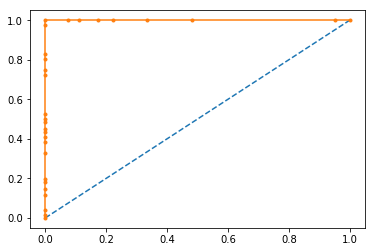

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## K-NN


In [41]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []


knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
train_score_array.append(knn.score(X_trainval, y_trainval))
test_score_array.append(knn.score(X_test, y_test))

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV


knn_clf = KNeighborsClassifier(3)
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

knn_bag = BaggingClassifier(knn_clf,bootstrap = True, random_state=0)

grid_search = GridSearchCV(knn_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'max_samples': 170, 'n_estimators': 100}
Best cross-validation score: 1.00


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
from sklearn.ensemble import BaggingClassifier


knn_clf = KNeighborsClassifier(3)
knn_bag_clf = BaggingClassifier(knn_clf, n_estimators=100, max_samples=170, bootstrap=True, random_state=0)

knn_bag_clf.fit(X_trainval, y_trainval)
y_pred = bag_clf.predict(X_test)

In [44]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from  sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

from  sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.9872611464968153
1.0
0.9736842105263158


In [45]:
knn_bag_clf.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(bag_clf.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.99


In [46]:


knnc_tr_pred = knn_bag_clf.predict(X_trainval)
knnc_test_pred = knn_bag_clf.predict(X_test)
print(knnc_tr_pred[4])

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, knnc_tr_pred))
print("f1 score: ", f1_score(y_trainval, knnc_tr_pred))
print("recall score: ", recall_score(y_trainval, knnc_tr_pred))
print("precision: ", precision_score(y_trainval, knnc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, knnc_test_pred))
print("f1 score: ", f1_score(y_test, knnc_test_pred))
print("recall score: ", recall_score(y_test, knnc_test_pred))
print("precision: ", precision_score(y_test, knnc_test_pred))

1
Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  0.9936305732484076
f1 score:  0.9933774834437086
recall score:  0.9868421052631579
precision:  1.0


AUC: 1.000
[2. 1. 0.]


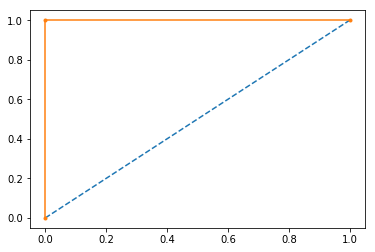

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# fit a model
knn_clf.fit(X_trainval,y_trainval)
# predict probabilities
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=0.987 auc=1.000 ap=1.000


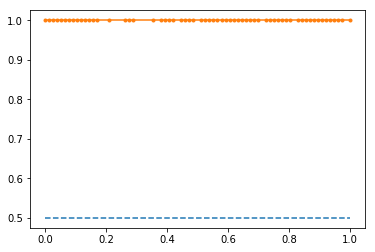

In [49]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = bag_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = bag_clf.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## PASTING - SVC LINEAR KERNEL

In [50]:
## svc linear kernel

from sklearn import svm
from sklearn.svm import SVC

In [51]:
svc_clf = SVC(C=1.0, gamma='auto')
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

svc_bag = BaggingClassifier(svc_clf,bootstrap = False, random_state=0)

grid_search = GridSearchCV(svc_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'max_samples': 200, 'n_estimators': 100}
Best cross-validation score: 0.98


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
from sklearn.ensemble import BaggingClassifier


svc_clf = SVC(C=1.0, gamma='auto')
svc_bag_clf = BaggingClassifier(svc_clf, n_estimators=100, max_samples=200, bootstrap= False, random_state=0)

svc_bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [53]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from  sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

from  sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.9872611464968153
1.0
0.9736842105263158


In [54]:
svc_bag_clf.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(bag_clf.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.99


In [55]:

svc_tr_pred = svc_bag_clf.predict(X_trainval)
svc_test_pred = svc_bag_clf.predict(X_test)

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_tr_pred))
print("precision: ", precision_score(y_trainval, svc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_test_pred))
print("f1 score: ", f1_score(y_test, svc_test_pred))
print("recall score: ", recall_score(y_test, svc_test_pred))
print("precision: ", precision_score(y_test, svc_test_pred))

Train data
Accuracy score:  0.9829424307036247
f1 score:  0.9821428571428572
recall score:  0.9649122807017544
precision:  1.0
   
Test data
Accuracy score:  0.9745222929936306
f1 score:  0.972972972972973
recall score:  0.9473684210526315
precision:  1.0


f1=0.973 auc=1.000 ap=1.000


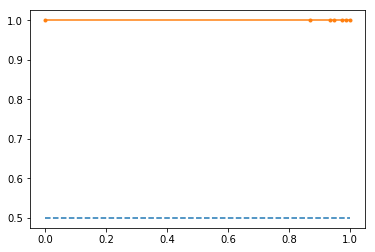

In [56]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = svc_bag_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = svc_bag_clf.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## SVC - KERNEL RBF

In [57]:
## kernel rbf
svc_rbf_clf = SVC(kernel='rbf',C=1.0, gamma=0.5)
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

svc_bag_clf = BaggingClassifier(svc_rbf_clf,bootstrap = False, random_state=0)

grid_search = GridSearchCV(svc_bag_clf , param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'max_samples': 50, 'n_estimators': 100}
Best cross-validation score: 1.00


In [58]:
from sklearn.ensemble import BaggingClassifier


svc_rbf_clf = SVC(kernel='rbf',C=1.0, gamma=0.5)
svc_bag_clf = BaggingClassifier(svc_rbf_clf, n_estimators=100, max_samples=50, bootstrap= False, random_state=0)

svc_bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [59]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from  sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

from  sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.9872611464968153
1.0
0.9736842105263158


In [60]:
svc_bag_clf.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(bag_clf.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.99


In [61]:
svc_tr_pred = svc_bag_clf.predict(X_trainval)
svc_test_pred = svc_bag_clf.predict(X_test)

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_tr_pred))
print("precision: ", precision_score(y_trainval, svc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_test_pred))
print("f1 score: ", f1_score(y_test, svc_test_pred))
print("recall score: ", recall_score(y_test, svc_test_pred))
print("precision: ", precision_score(y_test, svc_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


f1=1.000 auc=1.000 ap=1.000


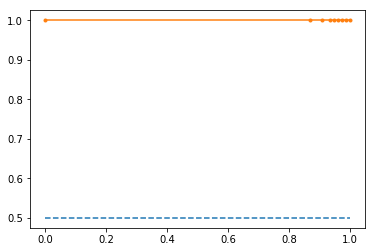

In [62]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = svc_bag_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = svc_bag_clf.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## GRADIENT BOOSTING - DECISION TREE

In [63]:
## decision tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_trainval, y_trainval)
dt_pred = dt_clf.predict(X_trainval)
dt_test_pred = dt_clf.predict(X_test)

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt.fit(X_trainval, y_trainval)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [65]:
gbrt.fit(X_trainval, y_trainval)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [66]:
gbrt_tr_pred = gbrt.predict(X_trainval)
gbrt_test_pred = gbrt.predict(X_test)



In [68]:

gbrt_tr_pred = gbrt.predict(X_trainval)
gbrt_test_pred= gbrt.predict(X_test)
      

In [69]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, dt_pred))
print("f1 score: ", f1_score(y_trainval, dt_pred))
print("recall score: ", recall_score(y_trainval, dt_pred))
print("precision: ", precision_score(y_trainval, dt_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, dt_test_pred))
print("f1 score: ", f1_score(y_test, dt_test_pred))
print("recall score: ", recall_score(y_test, dt_test_pred))
print("precision: ", precision_score(y_test, dt_test_pred))

Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


## ADABOOST CLASSIFIER - LINEAR SVC

In [70]:
## linear svc
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=1)

In [71]:
from sklearn.ensemble import AdaBoostClassifier
lsvc = LinearSVC(C=1)

n_estimators_vals = [100, 200, 300, 400, 500]
learning_rate_vals = [0.01, 0.1, 0.3, 0.5, 1.0]


param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals)
lsvc_ada = AdaBoostClassifier(lsvc, algorithm="SAMME",random_state=0)
grid_search = GridSearchCV(lsvc_ada, param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best cross-validation score: 1.00


In [72]:
ada_clf = AdaBoostClassifier(LinearSVC(C=1), n_estimators=100, algorithm="SAMME", learning_rate=0.01, random_state=0)
ada_clf.fit(X_trainval, y_trainval)


clf_tr_pred = ada_clf.predict(X_trainval)
clf_test_pred = ada_clf.predict(X_test)

In [73]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, clf_tr_pred))
print("f1 score: ", f1_score(y_trainval, clf_tr_pred))
print("recall score: ", recall_score(y_trainval, clf_tr_pred))
print("precision: ", precision_score(y_trainval, clf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, clf_test_pred))
print("f1 score: ", f1_score(y_test, clf_test_pred))
print("recall score: ", recall_score(y_test, clf_test_pred))
print("precision: ", precision_score(y_test, clf_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [74]:
pd.crosstab(y_trainval, clf_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [75]:
pd.crosstab(y_test, clf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [76]:
report = classification_report(y_test, clf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



## SVC KERNEL POLY- ADABOOST

In [78]:
## svc poly

poly_clf = SVC(kernel='poly',C=1.0, degree=1)

In [79]:
from sklearn.ensemble import AdaBoostClassifier
poly_clf = SVC(kernel='poly',C=1.0, degree=1)

n_estimators_vals = [100, 200, 300, 400, 500]
learning_rate_vals = [0.01, 0.1, 0.3, 0.5, 1.0]


param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals)
poly_clf_ada = AdaBoostClassifier(poly_clf, algorithm="SAMME",random_state=0)
grid_search = GridSearchCV(poly_clf_ada , param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.58


In [80]:

poly_clf = SVC(kernel='poly',C=1.0, degree=1)
poly_ada_clf = AdaBoostClassifier(poly_clf, n_estimators=100, algorithm="SAMME", learning_rate=0.5, random_state=0)
poly_ada_clf.fit(X_trainval, y_trainval)


clf_tr_pred = poly_ada_clf.predict(X_trainval)
clf_test_pred = poly_ada_clf.predict(X_test)

In [81]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, clf_tr_pred))
print("f1 score: ", f1_score(y_trainval, clf_tr_pred))
print("recall score: ", recall_score(y_trainval, clf_tr_pred))
print("precision: ", precision_score(y_trainval, clf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, clf_test_pred))
print("f1 score: ", f1_score(y_test, clf_test_pred))
print("recall score: ", recall_score(y_test, clf_test_pred))
print("precision: ", precision_score(y_test, clf_test_pred))

Train data
Accuracy score:  0.5138592750533049
f1 score:  0.0
recall score:  0.0
precision:  0.0
   
Test data
Accuracy score:  0.5159235668789809
f1 score:  0.0
recall score:  0.0
precision:  0.0


## DEEP NEURAL NETWORKS

In [82]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [83]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 28, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
opt = SGD(lr=0.01, momentum=0.9)
model1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

#step 3: train the model - fit
model1.fit(X_trainval, y_trainval, epochs = 10, batch_size = 400)

Epoch 1/10
469/469 [==============================] - 0s 405us/sample - loss: 0.7721 - accuracy: 0.1620
Epoch 2/10
469/469 [==============================] - 0s 16us/sample - loss: 0.7652 - accuracy: 0.1684
Epoch 3/10
469/469 [==============================] - 0s 16us/sample - loss: 0.7582 - accuracy: 0.1791
Epoch 4/10
469/469 [==============================] - 0s 15us/sample - loss: 0.7516 - accuracy: 0.1876
Epoch 5/10
469/469 [==============================] - 0s 14us/sample - loss: 0.7448 - accuracy: 0.2068
Epoch 6/10
469/469 [==============================] - 0s 20us/sample - loss: 0.7383 - accuracy: 0.2281
Epoch 7/10
469/469 [==============================] - 0s 17us/sample - loss: 0.7316 - accuracy: 0.2495
Epoch 8/10
469/469 [==============================] - 0s 14us/sample - loss: 0.7250 - accuracy: 0.2623
Epoch 9/10
469/469 [==============================] - 0s 14us/sample - loss: 0.7185 - accuracy: 0.2857
Epoch 10/10
469/469 [==============================] - 0s 22us/sample - 

## PCA

In [84]:
## PCA
from sklearn.decomposition import PCA



pca = PCA().fit(X)

In [85]:
# split data into train+validation set and test set
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 351   size of validation set: 118   size of test set: 157



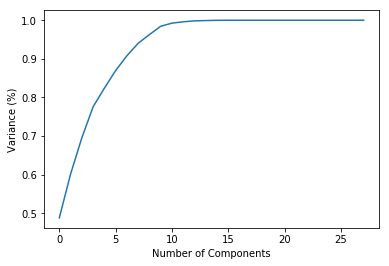

In [86]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.show()

In [87]:
pca = PCA(n_components=10)

X_trainval = pca.fit_transform(X_trainval)
X_test = pca.transform(X_test)

In [88]:
X_trainval.shape

(469, 10)

In [89]:
X_test.shape

(157, 10)

In [90]:
pca.explained_variance_

array([0.65195423, 0.1617534 , 0.13172169, 0.115613  , 0.07155135,
       0.06024924, 0.05344001, 0.04211779, 0.03353733, 0.03023716])

In [91]:
pca.n_components_

10

In [92]:
pca.explained_variance_ratio_

array([0.47388799, 0.11757419, 0.09574495, 0.08403598, 0.05200875,
       0.04379355, 0.03884411, 0.03061429, 0.02437738, 0.02197858])

In [93]:
np.sum(pca.explained_variance_ratio_)

0.982859760634868

## K-NN AFTER PCA

In [94]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_trainval, y_trainval)
    train_score_array.append(knn.score(X_trainval, y_trainval))
    test_score_array.append(knn.score(X_test, y_test))

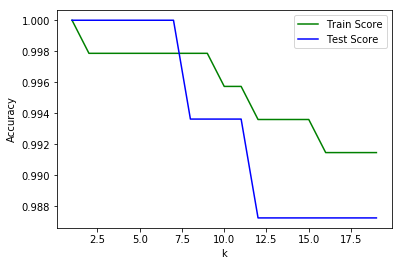

In [95]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [96]:
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier()


#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])
k_range = [1,3,5,7,9,12,15,17,20]          
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights = weights_range)


#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 1.00


In [97]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []


knn = KNeighborsClassifier(3)
knn.fit(X_trainval, y_trainval)
train_score_array.append(knn.score(X_trainval, y_trainval))
test_score_array.append(knn.score(X_test, y_test))

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

In [99]:
knn_c_bst_clf = KNeighborsClassifier(n_neighbors=1)

knn_c_bst_clf.fit(X_trainval,y_trainval)

knnc_tr_pred = knn_c_bst_clf.predict(X_trainval)
knnc_test_pred = knn_c_bst_clf.predict(X_test)
print(knnc_tr_pred[4])

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, knnc_tr_pred))
print("f1 score: ", f1_score(y_trainval, knnc_tr_pred))
print("recall score: ", recall_score(y_trainval, knnc_tr_pred))
print("precision: ", precision_score(y_trainval, knnc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, knnc_test_pred))
print("f1 score: ", f1_score(y_test, knnc_test_pred))
print("recall score: ", recall_score(y_test, knnc_test_pred))
print("precision: ", precision_score(y_test, knnc_test_pred))

1
Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [100]:
pd.crosstab(y_trainval, knnc_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [101]:
pd.crosstab(y_test, knnc_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [102]:
from sklearn.metrics import classification_report
report = classification_report(y_test, knnc_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



AUC: 1.000
[2. 1. 0.]


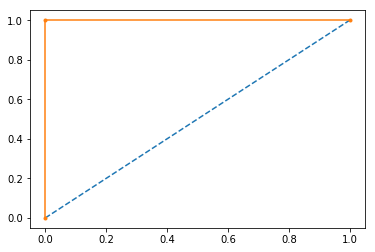

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# fit a model
knn_c_bst_clf.fit(X_trainval,y_trainval)
# predict probabilities
probs = knn_c_bst_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=1.000 auc=1.000 ap=1.000


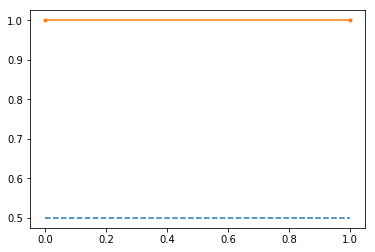

In [104]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = knn_c_bst_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = knn_c_bst_clf.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## LOGISTIC REGRESSION

In [105]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_trainval, y_trainval)
    log_l2.fit(X_trainval, y_trainval)
    train_score_l1.append(log_l1.score(X_trainval, y_trainval))
    train_score_l2.append(log_l2.score(X_trainval, y_trainval))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

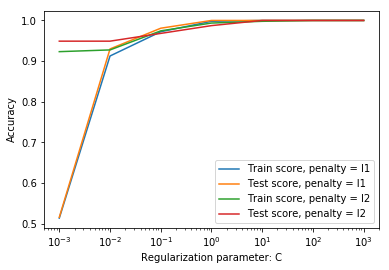

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [107]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty_mod = ['l1','l2']

log_reg = LogisticRegression()

#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(penalty=penalty_mod,C=c_range)
print(param_grid)

#instantiation of the grid
log_reg_grid = GridSearchCV(log_reg,param_grid, cv=10, scoring='accuracy')

# fitting the grid
log_reg_grid.fit(X, y)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [108]:
scores = cross_val_score(log_reg, X, y,cv=10) # input arguments followed by X and Y
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.984375   1.         1.         1.         1.
 0.98387097 1.         1.         0.83870968]


In [109]:
log_reg = LogisticRegression(penalty = 'l2', C = 1)
log_reg.fit(X_trainval, y_trainval)

print(log_reg.score(X_trainval, y_trainval))
print(log_reg.score(X_test, y_test))


logreg_tr_pred = log_reg.predict(X_trainval)
logreg_test_pred = log_reg.predict(X_test)

0.9936034115138592
0.9872611464968153


In [110]:
pd.crosstab(y_trainval, logreg_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,3,225


In [111]:
print(log_reg.score(X_trainval, y_trainval))

0.9936034115138592


In [112]:
pd.crosstab(y_test, logreg_test_pred)

col_0,0,1
RISK,,
0,81,0
1,2,74


In [113]:
print(log_reg.score(X_test, y_test))

0.9872611464968153


In [114]:
from sklearn.metrics import classification_report
report = classification_report(y_test, logreg_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       1.00      0.97      0.99        76

   micro avg       0.99      0.99      0.99       157
   macro avg       0.99      0.99      0.99       157
weighted avg       0.99      0.99      0.99       157



In [115]:
from sklearn.metrics import accuracy_score

print("Accuracy score: ", accuracy_score(y_trainval, logreg_tr_pred))
print("f1 score: ", f1_score(y_trainval, logreg_tr_pred))
print("recall score: ", recall_score(y_trainval, logreg_tr_pred))
print("precision: ", precision_score(y_trainval, logreg_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, logreg_test_pred))
print("f1 score: ", f1_score(y_test, logreg_test_pred))
print("recall score: ", recall_score(y_test, logreg_test_pred))
print("precision: ", precision_score(y_test, logreg_test_pred))

Accuracy score:  0.9936034115138592
f1 score:  0.9933774834437086
recall score:  0.9868421052631579
precision:  1.0
   
Test data
Accuracy score:  0.9872611464968153
f1 score:  0.9866666666666666
recall score:  0.9736842105263158
precision:  1.0


AUC: 1.000
[1.99999316 0.99999316 0.35667142 0.02871102 0.0286869  0.02832757
 0.02813376 0.02696169 0.02615027 0.02493556]


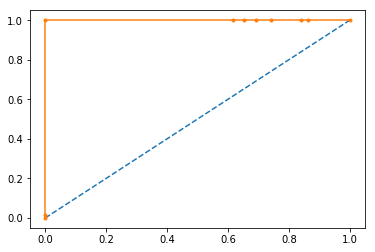

In [116]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=0.987 auc=1.000 ap=1.000


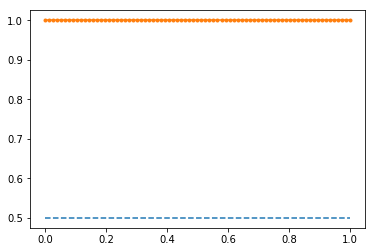

In [117]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = log_reg.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
y_prd_class_val = log_reg.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, y_prd_class_val)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## LINEAR SVC

In [118]:
from sklearn.svm import LinearSVC

In [119]:
c_range= [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=c_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [120]:
clf = LinearSVC()
linearsvc_grid_search = GridSearchCV(estimator=clf, param_grid = dict(C=c_range)   ,n_jobs=-1)
linearsvc_grid_search.fit(X, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [121]:
linearsvc_grid_search.best_params_

{'C': 1}

In [122]:
clf_best = LinearSVC(C=1)

In [123]:
clf_best.fit(X_trainval, y_trainval)

clf_tr_pred = clf_best.predict(X_trainval)
clf_test_pred = clf_best.predict(X_test)

In [124]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, clf_tr_pred))
print("f1 score: ", f1_score(y_trainval, clf_tr_pred))
print("recall score: ", recall_score(y_trainval, clf_tr_pred))
print("precision: ", precision_score(y_trainval, clf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, clf_test_pred))
print("f1 score: ", f1_score(y_test, clf_test_pred))
print("recall score: ", recall_score(y_test, clf_test_pred))
print("precision: ", precision_score(y_test, clf_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [125]:
pd.crosstab(y_trainval, clf_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [126]:
pd.crosstab(y_test, clf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [127]:
report = classification_report(y_test, clf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



## SVC LINEAR KERNEL

In [128]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=c_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [129]:
svc = SVC(kernel='linear')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range) ,n_jobs=-1)
grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [130]:
grid_search.best_score_

0.9984025559105432

In [131]:
grid_search.best_params_

{'C': 10}

In [132]:
svc_best = SVC(C=10, gamma='auto',probability=True)

In [133]:
svc_best.fit(X_trainval, y_trainval)

svc_tr_pred = svc_best.predict(X_trainval)
svc_test_pred = svc_best.predict(X_test)

In [134]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_tr_pred))
print("precision: ", precision_score(y_trainval, svc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_test_pred))
print("f1 score: ", f1_score(y_test, svc_test_pred))
print("recall score: ", recall_score(y_test, svc_test_pred))
print("precision: ", precision_score(y_test, svc_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [135]:
pd.crosstab(y_trainval, svc_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [136]:
pd.crosstab(y_test, svc_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [137]:
report = classification_report(y_test, svc_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



AUC: 1.000
[2.         1.         0.94359095 0.01022384 0.01022288 0.00993117
 0.00992115 0.00968229 0.00967852 0.00834227]


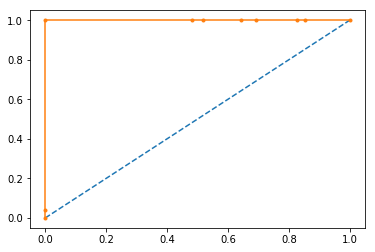

In [138]:
### ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = svc_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## SVC KERNEL RBF

In [139]:
#from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]
gamma_range=[0.001, 0.05,0.07,0.03,0.01,0.5,0.3, 0.1, 1, 10, 100]

param_grid = dict(C=c_range, gamma=gamma_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.05, 0.07, 0.03, 0.01, 0.5, 0.3, 0.1, 1, 10, 100]}


In [140]:
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range,gamma=gamma_range) ,n_jobs=-1)
grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.05, 0.07, 0.03, 0.01, 0.5, 0.3, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [141]:
grid_search.best_score_

0.9984025559105432

In [142]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.5}

In [143]:
svc_best_rbf = SVC(kernel='rbf',C=1.0, gamma=0.5)

In [144]:
svc_best_rbf.fit(X_trainval, y_trainval)

svc_rbf_tr_pred = svc_best_rbf.predict(X_trainval)
svc_rbf_test_pred = svc_best_rbf.predict(X_test)

In [145]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_rbf_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_rbf_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_rbf_tr_pred))
print("precision: ", precision_score(y_trainval, svc_rbf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_rbf_test_pred))
print("f1 score: ", f1_score(y_test, svc_rbf_test_pred))
print("recall score: ", recall_score(y_test, svc_rbf_test_pred))
print("precision: ", precision_score(y_test, svc_rbf_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [146]:
pd.crosstab(y_trainval, svc_rbf_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [147]:
pd.crosstab(y_test, svc_rbf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [148]:
report = classification_report(y_test, svc_rbf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



## SVC KERNEL POLY

In [149]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]
degree_range=[1,2,3,4]

param_grid = dict(C=c_range, degree = degree_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4]}


In [150]:
svc = SVC(kernel='poly')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range,degree = degree_range) ,n_jobs=-1)
grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [151]:
grid_search.best_score_

0.9984025559105432

In [152]:
grid_search.best_params_

{'C': 100, 'degree': 1}

In [153]:
svc_best_poly = SVC(kernel='poly',C=100, degree=1)

In [154]:
svc_best_poly.fit(X_trainval, y_trainval)

svc_poly_tr_pred = svc_best_poly.predict(X_trainval)
svc_poly_test_pred = svc_best_poly.predict(X_test)

In [155]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_poly_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_poly_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_poly_tr_pred))
print("precision: ", precision_score(y_trainval, svc_poly_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_poly_test_pred))
print("f1 score: ", f1_score(y_test, svc_poly_test_pred))
print("recall score: ", recall_score(y_test, svc_poly_test_pred))
print("precision: ", precision_score(y_test, svc_poly_test_pred))

Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [156]:
pd.crosstab(y_trainval, svc_poly_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [157]:
pd.crosstab(y_test, svc_rbf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [158]:
report = classification_report(y_test, svc_poly_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



## DECISION TREE

In [159]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
param_grid = dict(max_depth=[4,6,8,10])

gs_dt = GridSearchCV(dt, param_grid=param_grid, cv=10, scoring='accuracy')
gs_dt.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 6, 8, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [160]:
gs_dt.best_score_

1.0

In [161]:
gs_dt.best_params_

{'max_depth': 4}

In [162]:
dt_best = DecisionTreeClassifier(max_depth=4)
dt_best.fit(X_trainval, y_trainval)
dt_pred = dt_best.predict(X_trainval)
dt_test_pred = dt_best.predict(X_test)

In [163]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, dt_pred))
print("f1 score: ", f1_score(y_trainval, dt_pred))
print("recall score: ", recall_score(y_trainval, dt_pred))
print("precision: ", precision_score(y_trainval, dt_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, dt_test_pred))
print("f1 score: ", f1_score(y_test, dt_test_pred))
print("recall score: ", recall_score(y_test, dt_test_pred))
print("precision: ", precision_score(y_test, dt_test_pred))

Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [164]:
pd.crosstab(y_trainval, dt_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [165]:
pd.crosstab(y_test, dt_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [166]:
report = classification_report(y_test, dt_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



AUC: 1.000
[2. 1. 0.]


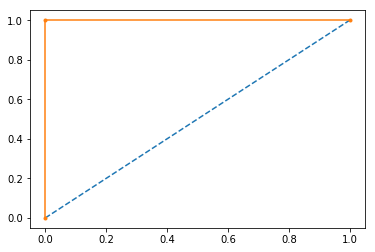

In [167]:
### ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = dt_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=1.000 auc=1.000 ap=1.000


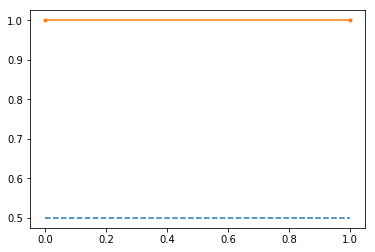

In [168]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = dt_best.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
y_prd_class_val = dt_best.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, y_prd_class_val)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## DEEP NEURAL NETWORKS

In [169]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 10, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
opt = SGD(lr=0.01, momentum=0.9)
model1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

#step 3: train the model - fit
model1.fit(X_trainval, y_trainval, epochs = 10, batch_size = 400)

Epoch 1/10
469/469 [==============================] - 0s 498us/sample - loss: 0.6058 - accuracy: 0.8507
Epoch 2/10
469/469 [==============================] - 0s 16us/sample - loss: 0.6023 - accuracy: 0.8550
Epoch 3/10
469/469 [==============================] - 0s 15us/sample - loss: 0.5990 - accuracy: 0.8550
Epoch 4/10
469/469 [==============================] - 0s 15us/sample - loss: 0.5956 - accuracy: 0.8571
Epoch 5/10
469/469 [==============================] - 0s 24us/sample - loss: 0.5923 - accuracy: 0.8657
Epoch 6/10
469/469 [==============================] - 0s 23us/sample - loss: 0.5890 - accuracy: 0.8721
Epoch 7/10
469/469 [==============================] - 0s 14us/sample - loss: 0.5857 - accuracy: 0.8721
Epoch 8/10
469/469 [==============================] - 0s 17us/sample - loss: 0.5824 - accuracy: 0.8742
Epoch 9/10
469/469 [==============================] - 0s 13us/sample - loss: 0.5791 - accuracy: 0.8806
Epoch 10/10
469/469 [==============================] - 0s 28us/sample - 

# CONCLUSION:  

### The file consists of classification  models with:
# Hard Voting - Applied on  SVC & KNeighborsClassifier 
SVC 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0
SVC 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0
SVC 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0
# soft Voting - Applied on Logisitc Regression , KNeighborsClassifier 
LogisticRegression 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0
LogisticRegression 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0
LogisticRegression 1.0
KNeighborsClassifier 1.0
VotingClassifier 1.0

# Bagging 
## LOGISITC REGRESSION:
Train score: 0.99
Test score: 0.99

   precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157

## KNeighborsClassifier
Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  0.9936305732484076
f1 score:  0.9933774834437086
recall score:  0.9868421052631579
precision:  1.0
# Pasting
## Linear svc
Train score: 0.99
Test score: 0.99


Train data
Accuracy score:  0.9829424307036247
f1 score:  0.9821428571428572
recall score:  0.9649122807017544
precision:  1.0
   
Test data
Accuracy score:  0.9745222929936306
f1 score:  0.972972972972973
recall score:  0.9473684210526315
precision:  1.0

## Kernel rbf:
Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0

# Adaboost 
Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
##svc poly

Train data
Accuracy score:  0.5138592750533049
f1 score:  0.0
recall score:  0.0
precision:  0.0
   
Test data
Accuracy score:  0.5159235668789809
f1 score:  0.0
recall score:  0.0
precision:  0.0


# Gradient Boosting -DECISION TREE
Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0

# Deep Neural Network 
Epoch 1/10
469/469 [==============================] - 0s 405us/sample - loss: 0.7721 - accuracy: 0.1620
Epoch 2/10
469/469 [==============================] - 0s 16us/sample - loss: 0.7652 - accuracy: 0.1684
Epoch 3/10
469/469 [==============================] - 0s 16us/sample - loss: 0.7582 - accuracy: 0.1791
Epoch 4/10
469/469 [==============================] - 0s 15us/sample - loss: 0.7516 - accuracy: 0.1876
Epoch 5/10
469/469 [==============================] - 0s 14us/sample - loss: 0.7448 - accuracy: 0.2068
Epoch 6/10
469/469 [==============================] - 0s 20us/sample - loss: 0.7383 - accuracy: 0.2281
Epoch 7/10
469/469 [==============================] - 0s 17us/sample - loss: 0.7316 - accuracy: 0.2495
Epoch 8/10
469/469 [==============================] - 0s 14us/sample - loss: 0.7250 - accuracy: 0.2623
Epoch 9/10
469/469 [==============================] - 0s 14us/sample - loss: 0.7185 - accuracy: 0.2857
Epoch 10/10
469/469 [==============================] - 0s 22us/sample - loss: 0.7120 - accuracy: 0.3006


After pca :
Epoch 1/10
469/469 [==============================] - 0s 498us/sample - loss: 0.6058 - accuracy: 0.8507
Epoch 2/10
469/469 [==============================] - 0s 16us/sample - loss: 0.6023 - accuracy: 0.8550
Epoch 3/10
469/469 [==============================] - 0s 15us/sample - loss: 0.5990 - accuracy: 0.8550
Epoch 4/10
469/469 [==============================] - 0s 15us/sample - loss: 0.5956 - accuracy: 0.8571
Epoch 5/10
469/469 [==============================] - 0s 24us/sample - loss: 0.5923 - accuracy: 0.8657
Epoch 6/10
469/469 [==============================] - 0s 23us/sample - loss: 0.5890 - accuracy: 0.8721
Epoch 7/10
469/469 [==============================] - 0s 14us/sample - loss: 0.5857 - accuracy: 0.8721
Epoch 8/10
469/469 [==============================] - 0s 17us/sample - loss: 0.5824 - accuracy: 0.8742
Epoch 9/10
469/469 [==============================] - 0s 13us/sample - loss: 0.5791 - accuracy: 0.8806
Epoch 10/10
469/469 [==============================] - 0s 28us/sample - loss: 0.57


## The Deep Neural networks show a drastic change in accuracy before and after pca


#### The boosting algorithms were applied on the previous project models with best parameters to reduce the error in the model..There is not much change in the results from the previous project. 

